<h1><b>Generate Data (ONLY NEED TO RUN ONCE TO GENERATE THE FILE IF IT IS NOT ALREADY GENERATED)<b><h1>

In [16]:
import config
from sentiment_preprocessor import SentimentPreprocessor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

preprocessor = SentimentPreprocessor("youtube_sentiment.csv.gz")
preprocessor.filter(comment_col=0, label_col=1)
preprocessor.map_labels(negative=0, neutral=1, positive=2)

#preprocessor.bag_of_words(vectorizer=bow_vectorizer)

<h1><b>Helper Functions<b><h1>

In [2]:
import config
import constants
from sentiment_preprocessor import SentimentPreprocessor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm.notebook import tqdm

def plot_train_test_accuracy(title, x_axis_label, parameter, train_accuracy, test_accuracy):
    plt.plot(parameter, train_accuracy)
    plt.plot(parameter, test_accuracy)
    plt.grid()
    plt.legend(["Training", "Test"])
    plt.xlabel(x_axis_label)
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.show()

# Confusion Matrix for Visualization
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

<h1><b>Load Data<b><h1>

In [3]:
# Load Preprocessed Data
df = pd.read_csv(constants.PATH_DATA_PROCESSED + "youtube_sentiment.csv.gz", compression='gzip')
print("Dataset Shape:", df.shape)
print("Dataset Sample:")
print(df.head())
# Keep only positive (1) and negative (-1) sentiments (binary classification)
#df = df[df['label'] != 0]

# Splitting into training and testing sets
X_text = df['comment']
y = df['label']

Dataset Shape: (18408, 2)
Dataset Sample:
                                             comment  label
0  lets not forget that apple pay in 2014 require...      0
1  here in nz 50 of retailers don’t even have con...     -1
2  i will forever acknowledge this channel with t...      1
3  whenever i go to a place that doesn’t take app...     -1
4  apple pay is so convenient secure and easy to ...      1


<h1><b>Bag of Words Experiments<b><h1>

In [19]:
# Experiment 1: Bag of Words (BoW)
bow_vectorizer = CountVectorizer(
    max_features=1000,
    stop_words='english',
    vocabulary=None,
    lowercase=True,
    strip_accents='unicode'
)

# Transform text data into BoW representation
X_bow = bow_vectorizer.fit_transform(X_text)

In [4]:
print(bow_vectorizer.get_feature_names_out())

['10' '100' '1010' '12' '13' '14' '15' '16' '20' '2022' '2222' '2323' '25'
 '30' '3x3' '50' 'abian' 'ability' 'able' 'absolute' 'absolutely' 'access'
 'action' 'actual' 'actually' 'add' 'added' 'advice' 'age' 'ago' 'agree'
 'ahead' 'ai' 'air' 'algorithm' 'amazing' 'american' 'analysis' 'analyst'
 'anh' 'animals' 'answer' 'answers' 'anymore' 'apple' 'apply' 'appreciate'
 'approach' 'apreciado' 'area' 'arent' 'art' 'artisticas' 'ask' 'asked'
 'asking' 'asmr' 'attention' 'audience' 'available' 'average' 'away'
 'awesome' 'background' 'bad' 'base' 'based' 'basic' 'basically' 'battery'
 'battle' 'beast' 'beat' 'beautiful' 'bed' 'beginning' 'believe'
 'bellamente' 'best' 'better' 'big' 'bigger' 'biggest' 'biology' 'bit'
 'bitcoin' 'black' 'bless' 'blue' 'body' 'book' 'books' 'born' 'bought'
 'box' 'brain' 'break' 'brillantes' 'brilliant' 'bring' 'bro' 'brother'
 'brought' 'btc' 'build' 'building' 'business' 'buy' 'buying' 'called'
 'came' 'camera' 'car' 'care' 'career' 'case' 'cause' 'certai

In [5]:
print(X_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
#Keep 2250 samples for each class
random_seed = 107

#samples to pick per label
samples_per_label = 2250

#randomize samples picked per label without replacement
np.random.seed(random_seed)
list_of_labels = [-1, 0, 1]
indicies = {label: np.where(y == label)[0] for label in list_of_labels}
samples = {label: np.random.choice(indicies[label], samples_per_label, replace=False) for label in list_of_labels}

all_samples = np.concatenate([samples[label] for label in list_of_labels])
#want to mix up labels now since samples are seperated by label
np.random.shuffle(all_samples)

y = y[all_samples]
X_bow = X_bow[all_samples]

In [ ]:
print(len(y))
print(X_bow.shape)

6750
(6750, 1000)


In [9]:
# Train-Test Split (80-20)
X_bow_train, X_bow_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

<h1><b>Tune SVM With Grid Search<b><h1>

In [12]:
# Define SVM Model
#svm_model = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')  # ovr is one to rest classification

# Train and Evaluate BoW-based SVM
#svm_model.fit(X_bow_train, y_train)
#y_bow_pred = svm_model.predict(X_bow_test)


# Print Evaluation Results
#print("SVM with BoW Results:")
#print("Accuracy:", accuracy_score(y_test, y_bow_pred))
#print(classification_report(y_test, y_bow_pred))



param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'scale', 'auto']  # Only relevant for non-linear kernels
}

grid_search = GridSearchCV(SVC(decision_function_shape='ovr', verbose=True), param_grid, cv=5, scoring='accuracy', n_jobs=4)
grid_search.fit(X_bow_train, y_train)

# Step 7: Train Final Optimized Model
best_params = grid_search.best_params_
print(f"Best Parameters Found: {best_params}")

optimized_svm = SVC(**best_params, decision_function_shape='ovr')
optimized_svm.fit(X_bow_train, y_train)

[LibSVM]Best Parameters Found: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


SVC(C=1, gamma=0.1)

<h1><b>Results (Grid Search)<b><h1>


 Optimized SVM with BoW Results:
Accuracy: 0.6244444444444445
              precision    recall  f1-score   support

          -1       0.58      0.60      0.59       456
           0       0.56      0.63      0.59       452
           1       0.78      0.64      0.71       442

    accuracy                           0.62      1350
   macro avg       0.64      0.62      0.63      1350
weighted avg       0.64      0.62      0.63      1350



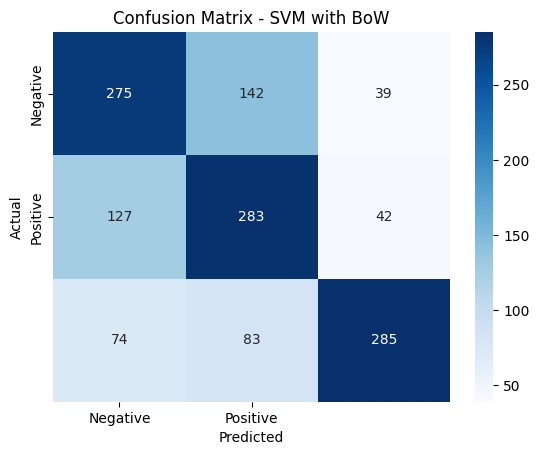

In [ ]:
# Step 8: Evaluate Optimized SVM Model
y_bow_pred_tuned = optimized_svm.predict(X_bow_test)

print("\n Optimized SVM with BoW Results:")
print("Accuracy:", accuracy_score(y_test, y_bow_pred_tuned))
print(classification_report(y_test, y_bow_pred_tuned))

# Plot confusion matrices
plot_confusion_matrix(y_test, y_bow_pred_tuned, "Confusion Matrix - SVM with BoW")

<h1><b>Tune With RandomizedSearch<b><h1>

In [16]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'scale', 'auto']  # Only relevant for non-linear kernels
}

random_search = RandomizedSearchCV(SVC(decision_function_shape='ovr', verbose=True), param_grid, cv=5, scoring='accuracy', n_jobs=4)
random_search.fit(X_bow_train, y_train)

# Step 7: Train Final Optimized Model
best_params = grid_search.best_params_
print(f"Best Parameters Found: {best_params}")

optimized_random_svm = SVC(**best_params, decision_function_shape='ovr')
optimized_random_svm.fit(X_bow_train, y_train)

[LibSVM]Best Parameters Found: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


SVC(C=1, gamma=0.1)

<h1><b>Results (Randomized Search)<b><h1>


 Optimized SVM with BoW Results:
Accuracy: 0.6244444444444445
              precision    recall  f1-score   support

          -1       0.58      0.60      0.59       456
           0       0.56      0.63      0.59       452
           1       0.78      0.64      0.71       442

    accuracy                           0.62      1350
   macro avg       0.64      0.62      0.63      1350
weighted avg       0.64      0.62      0.63      1350



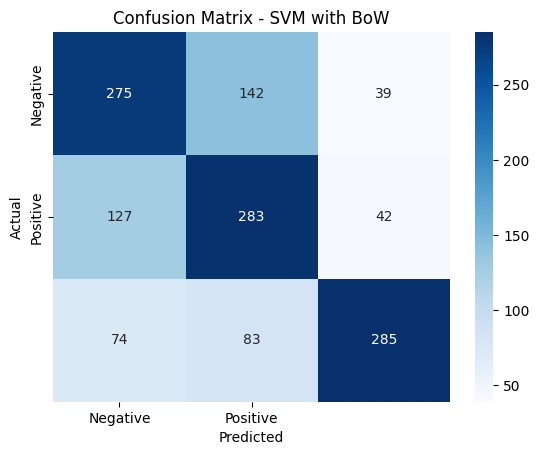

In [17]:
# Step 8: Evaluate Optimized SVM Model
y_bow_pred_tuned = optimized_random_svm.predict(X_bow_test)

print("\n Optimized SVM with BoW Results:")
print("Accuracy:", accuracy_score(y_test, y_bow_pred_tuned))
print(classification_report(y_test, y_bow_pred_tuned))

# Confusion Matrix for Visualization
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, y_bow_pred_tuned, "Confusion Matrix - SVM with BoW")

<h1><b>Train With 1/4 as Many Samples (Even Ratio of Classified Samples)<b><h1>

In [27]:
#Keep 2250 samples for each class
random_seed = 107

#samples to pick per label
samples_per_label = 575

#randomize samples picked per label without replacement
np.random.seed(random_seed)
list_of_labels = [-1, 0, 1]
indicies = {label: np.where(y == label)[0] for label in list_of_labels}
samples = {label: np.random.choice(indicies[label], samples_per_label, replace=False) for label in list_of_labels}

all_samples = np.concatenate([samples[label] for label in list_of_labels])
#want to mix up labels now since samples are seperated by label
np.random.shuffle(all_samples)

y_less = y[all_samples]
X_bow_less = X_bow[all_samples]

In [28]:
# Train-Test Split (80-20)
X_bow_train, X_bow_test, y_train, y_test = train_test_split(X_bow_less, y_less, test_size=0.2, random_state=42)

<h1><b>Tune With Grid Search<b><h1>

In [29]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'scale', 'auto']  # Only relevant for non-linear kernels
}

grid_search_less = GridSearchCV(SVC(decision_function_shape='ovr', verbose=True), param_grid, cv=5, scoring='accuracy', n_jobs=4)
grid_search_less.fit(X_bow_train, y_train)

# Step 7: Train Final Optimized Model
best_params = grid_search.best_params_
print(f"Best Parameters Found: {best_params}")

optimized_svm_less = SVC(**best_params, decision_function_shape='ovr')
optimized_svm_less.fit(X_bow_train, y_train)

[LibSVM]Best Parameters Found: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


SVC(C=1, gamma=0.1)

<b><h1>Results (Grid Search)<b><h1>


 Optimized SVM with BoW Results:
Accuracy: 0.5797101449275363
              precision    recall  f1-score   support

          -1       0.50      0.58      0.54       115
           0       0.55      0.70      0.62       111
           1       0.77      0.46      0.58       119

    accuracy                           0.58       345
   macro avg       0.61      0.58      0.58       345
weighted avg       0.61      0.58      0.58       345



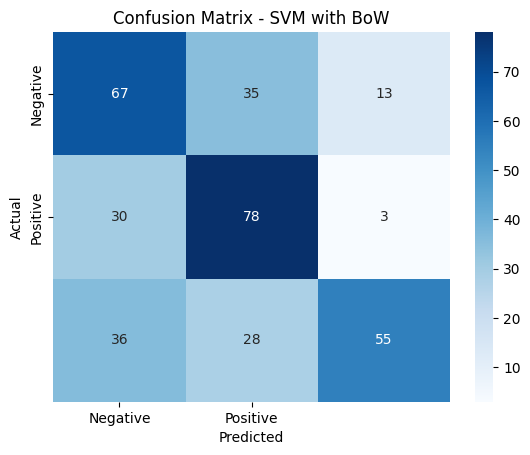

In [30]:
# Step 8: Evaluate Optimized SVM Model
y_bow_pred_tuned = optimized_svm_less.predict(X_bow_test)

print("\n Optimized SVM with BoW Results:")
print("Accuracy:", accuracy_score(y_test, y_bow_pred_tuned))
print(classification_report(y_test, y_bow_pred_tuned))

# Confusion Matrix for Visualization
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, y_bow_pred_tuned, "Confusion Matrix - SVM with BoW")

<h1><b>Testing Number of Features<b><h1>

In [ ]:
features = []
train_accuracy = []
test_accuracy = []

start=5
stop=1000
step=5
total=int((stop-start)/step)

#samples to pick per label
samples_per_label = 2250

random_seed = 107
np.random.seed(random_seed)

list_of_labels = [-1, 0, 1]
with tqdm(total=total, desc="Testing: ") as progress_bar:
    for i in range(start, stop, step):
        X_text = df['comment']
        y = df['label']

        bow_vectorizer = CountVectorizer(
            max_features=i,
            stop_words='english',
            vocabulary=None,
            lowercase=True,
            strip_accents='unicode'
        )

        # Transform text data into BoW representation
        X_bow = bow_vectorizer.fit_transform(X_text)

        #Still keep even number of classified samples
        #randomize samples picked per label without replacement
        indicies = {label: np.where(y == label)[0] for label in list_of_labels}
        samples = {label: np.random.choice(indicies[label], samples_per_label, replace=False) for label in list_of_labels}

        all_samples = np.concatenate([samples[label] for label in list_of_labels])
        #want to mix up labels now since samples are seperated by label
        np.random.shuffle(all_samples)

        y = y[all_samples]
        X_bow = X_bow[all_samples]

        # Train-Test Split (80-20)
        X_bow_train, X_bow_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

        #Let the training begin!
        features.append(i)
        #Try with best params found using grid search
        svm = SVC(decision_function_shape='ovr', C=1, gamma=0.1, kernel="rbf")
        svm.fit(X_bow_train, y_train)
        train_accuracy.append(svm.score(X_bow_train, y_train))
        test_accuracy.append(svm.score(X_bow_test, y_test))

        progress_bar.update()

plot_train_test_accuracy(title="Accuracy vs Number of Features" ,x_axis_label="Number of Features", parameter=features, train_accuracy=train_accuracy, test_accuracy=test_accuracy)
    

Testing:   0%|          | 0/199.0 [00:00<?, ?it/s]

KeyboardInterrupt: 